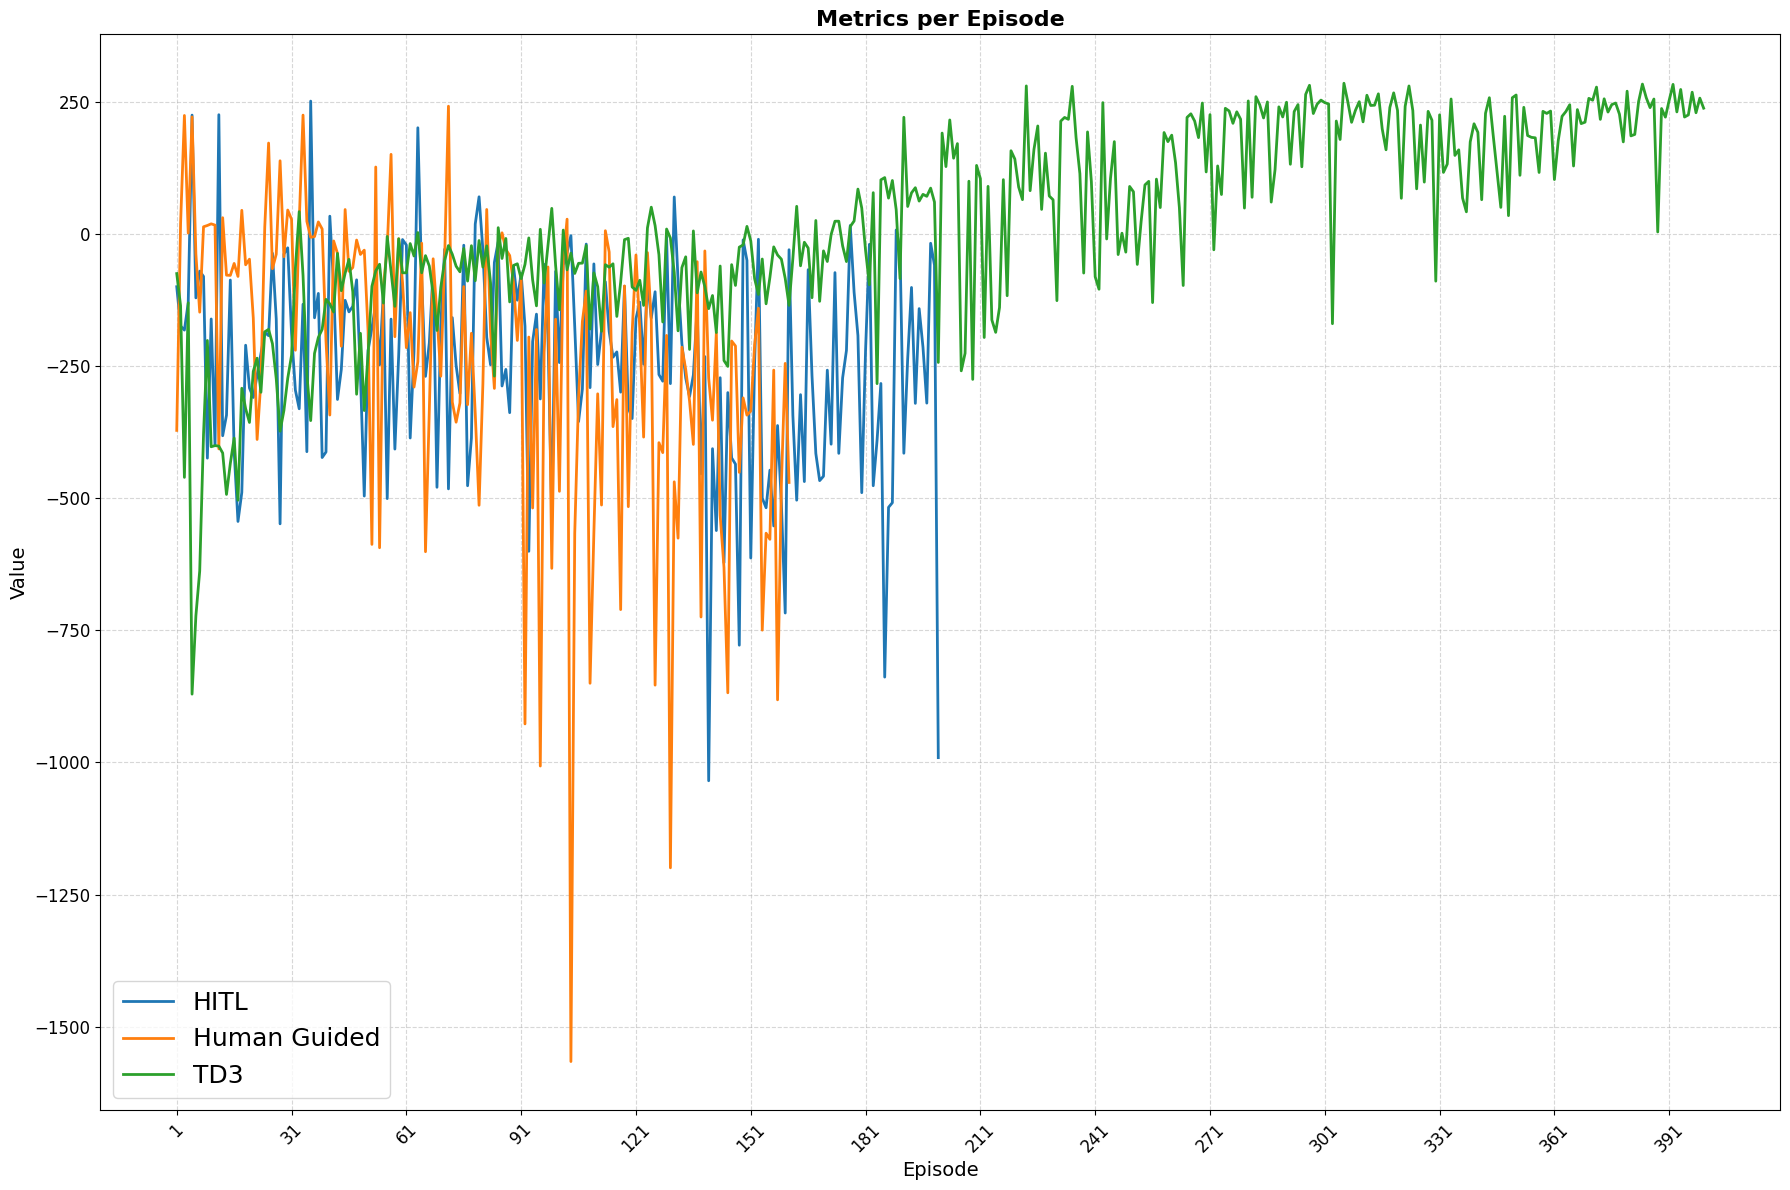

In [15]:
import json
import os
import matplotlib.pyplot as plt

def process_json(json_file):
    """
    Muat data dari file JSON dan ubah nilai null menjadi 0.

    Parameters:
    - json_file: Path ke file JSON.

    Returns:
    - Dictionary dengan nilai null diganti dengan 0.
    """
    if os.path.exists(json_file):
        with open(json_file, 'r') as f:
            data = json.load(f)
        
        # Ganti nilai null dengan 0
        processed_data = {key: (value if value is not None else 0) for key, value in data.items()}
        return processed_data
    else:
        print(f"File {json_file} tidak ditemukan.")
        return {}

def plot_metrics(json_files, labels, title, xlabel, ylabel, x_tick_interval=50):
    """
    Fungsi untuk memuat data dari file JSON dan membuat grafik.

    Parameters:
    - json_files: List file JSON untuk setiap metrik
    - labels: List label untuk setiap metrik
    - title: Judul grafik
    - xlabel: Label sumbu x
    - ylabel: Label sumbu y
    - x_tick_interval: Interval tampilan ticks pada sumbu x
    """
    plt.figure(figsize=(18, 12))
    
    for json_file, label in zip(json_files, labels):
        data = process_json(json_file)
        
        if data:
            # Sort data berdasarkan episode (key)
            sorted_episodes = sorted(data.keys(), key=lambda x: int(x))
            sorted_values = [data[episode] for episode in sorted_episodes]
            
            # Plot data dengan garis tebal
            plt.plot(sorted_episodes, sorted_values, label=label, linewidth=2)
    
    # Atur ticks sumbu x
    if data:
        max_episode = max(map(int, data.keys()))
        plt.xticks(
            range(0, max_episode + 1, x_tick_interval),
            fontsize=12,
            rotation=45
        )
    
    # Tambahkan label, judul, dan legenda
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=18, loc='best')  # Lokasi otomatis untuk legenda
    plt.grid(True, alpha=0.5, linestyle='--')
    plt.tight_layout()  # Agar grafik tidak terpotong
    plt.show()

# Path ke file JSON
TD3_dir = 'D:/KULIAH/skripsi/CODE/skripsi/1_TD3_origin/saved_models_2_final'  
HITL_dir = 'D:/KULIAH/skripsi/CODE/skripsi/3_HITL/saved_models_3_200ep' 
HG_dir = 'D:/KULIAH/skripsi/CODE/skripsi/2_Human_guided/saved_models_1_160ep'
# files = [
#     os.path.join(HITL_dir, 'A_cumulative_rewards.json'),
#     os.path.join(HITL_dir, 'A_count_ask_human.json'),
#     os.path.join(HITL_dir, 'A_count_human_help.json')
# ]
files = [
    os.path.join(HITL_dir, 'A_cumulative_rewards.json'),
    os.path.join(HG_dir, 'A_cumulative_rewards.json'),
    os.path.join(TD3_dir, 'A_cumulative_rewards.json'),
]
# Labels untuk grafik
labels = ['HITL', 'Human Guided', 'TD3']

# Panggil fungsi plot
plot_metrics(
    json_files=files,
    labels=labels,
    title='Metrics per Episode',
    xlabel='Episode',
    ylabel='Value',
    x_tick_interval=30  # Interval ticks setiap 50 episode
)
